In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('CC GENERAL.csv')
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [16]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [17]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [18]:
from sklearn.preprocessing import Normalizer


values = Normalizer().fit_transform(df.values)

In [19]:
from sklearn.cluster import KMeans


cluster = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = cluster.fit_predict(values)

In [20]:
from sklearn import metrics


labels = cluster.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36454314826693845


In [21]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075812734747931


In [24]:
calinsky = metrics.calinski_harabasz_score(values, labels)
print(calinsky)

3431.8005407346513


In [55]:
def clustering_metrics(data, n_clusters):
    cluster = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = cluster.fit_predict(data)
    
    s = metrics.silhouette_score(data, labels=labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(data, labels)
    calinski = metrics.calinski_harabasz_score(data, labels)
    
    return s, dbs, calinski

In [57]:
s1, dbs1, cal1 = clustering_metrics(values, 3)
print('{:.2f} {:.2f} {:.2f}'.format(s1, dbs1, cal1))

0.33 1.30 3526.34


In [58]:
s2, dbs2, cal2 = clustering_metrics(values, 5)
print('{:.2f} {:.2f} {:.2f}'.format(s2, dbs2, cal2))

0.36 1.08 3431.79


In [60]:
s3, dbs3, cal3 = clustering_metrics(values, 20)
print('{:.2f} {:.2f} {:.2f}'.format(s3, dbs3, cal3))

0.27 1.22 2386.64


In [83]:
import numpy as np


random_data = np.random.rand(df.shape[0], df.shape[1])
s, dbs, cal = clustering_metrics(random_data, 5)
    
print('\t\t\tSil  \tDBS  \tCal')
print('Original Data (k=5):\t{:.2f} \t{:.2f} \t{:.2f}'.format(s2, dbs2, cal2))
print('Random Data (k=5):\t{:.2f} \t{:.2f} \t{:.2f}'.format(s, dbs, cal))

			Sil  	DBS  	Cal
Original Data (k=5):	0.36 	1.08 	3431.79
Random Data (k=5):	0.04 	3.46 	303.94


In [75]:
round(304.64668349183034, 2)

304.65

In [86]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, cal1 = clustering_metrics(set1, 5)
s2, dbs2, cal2 = clustering_metrics(set2, 5)
s3, dbs3, cal3 = clustering_metrics(set3, 5)


print('\tSil  \tDBS  \tCal')
print('Set1:\t{:.2f} \t{:.2f} \t{:.2f}'.format(s1, dbs1, cal1))
print('Set2:\t{:.2f} \t{:.2f} \t{:.2f}'.format(s2, dbs2, cal2))
print('Set3:\t{:.2f} \t{:.2f} \t{:.2f}'.format(s3, dbs3, cal3))

	Sil  	DBS  	Cal
Set1:	0.37 	1.06 	1204.11
Set2:	0.35 	1.14 	1194.95
Set3:	0.37 	1.10 	1167.51


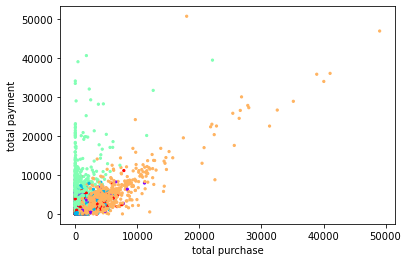

In [88]:
import matplotlib.pyplot as plt


plt.scatter(df.PURCHASES, df.PAYMENTS, c=labels, s=5, cmap='rainbow')
plt.xlabel('total purchase')
plt.ylabel('total payment')
plt.show()

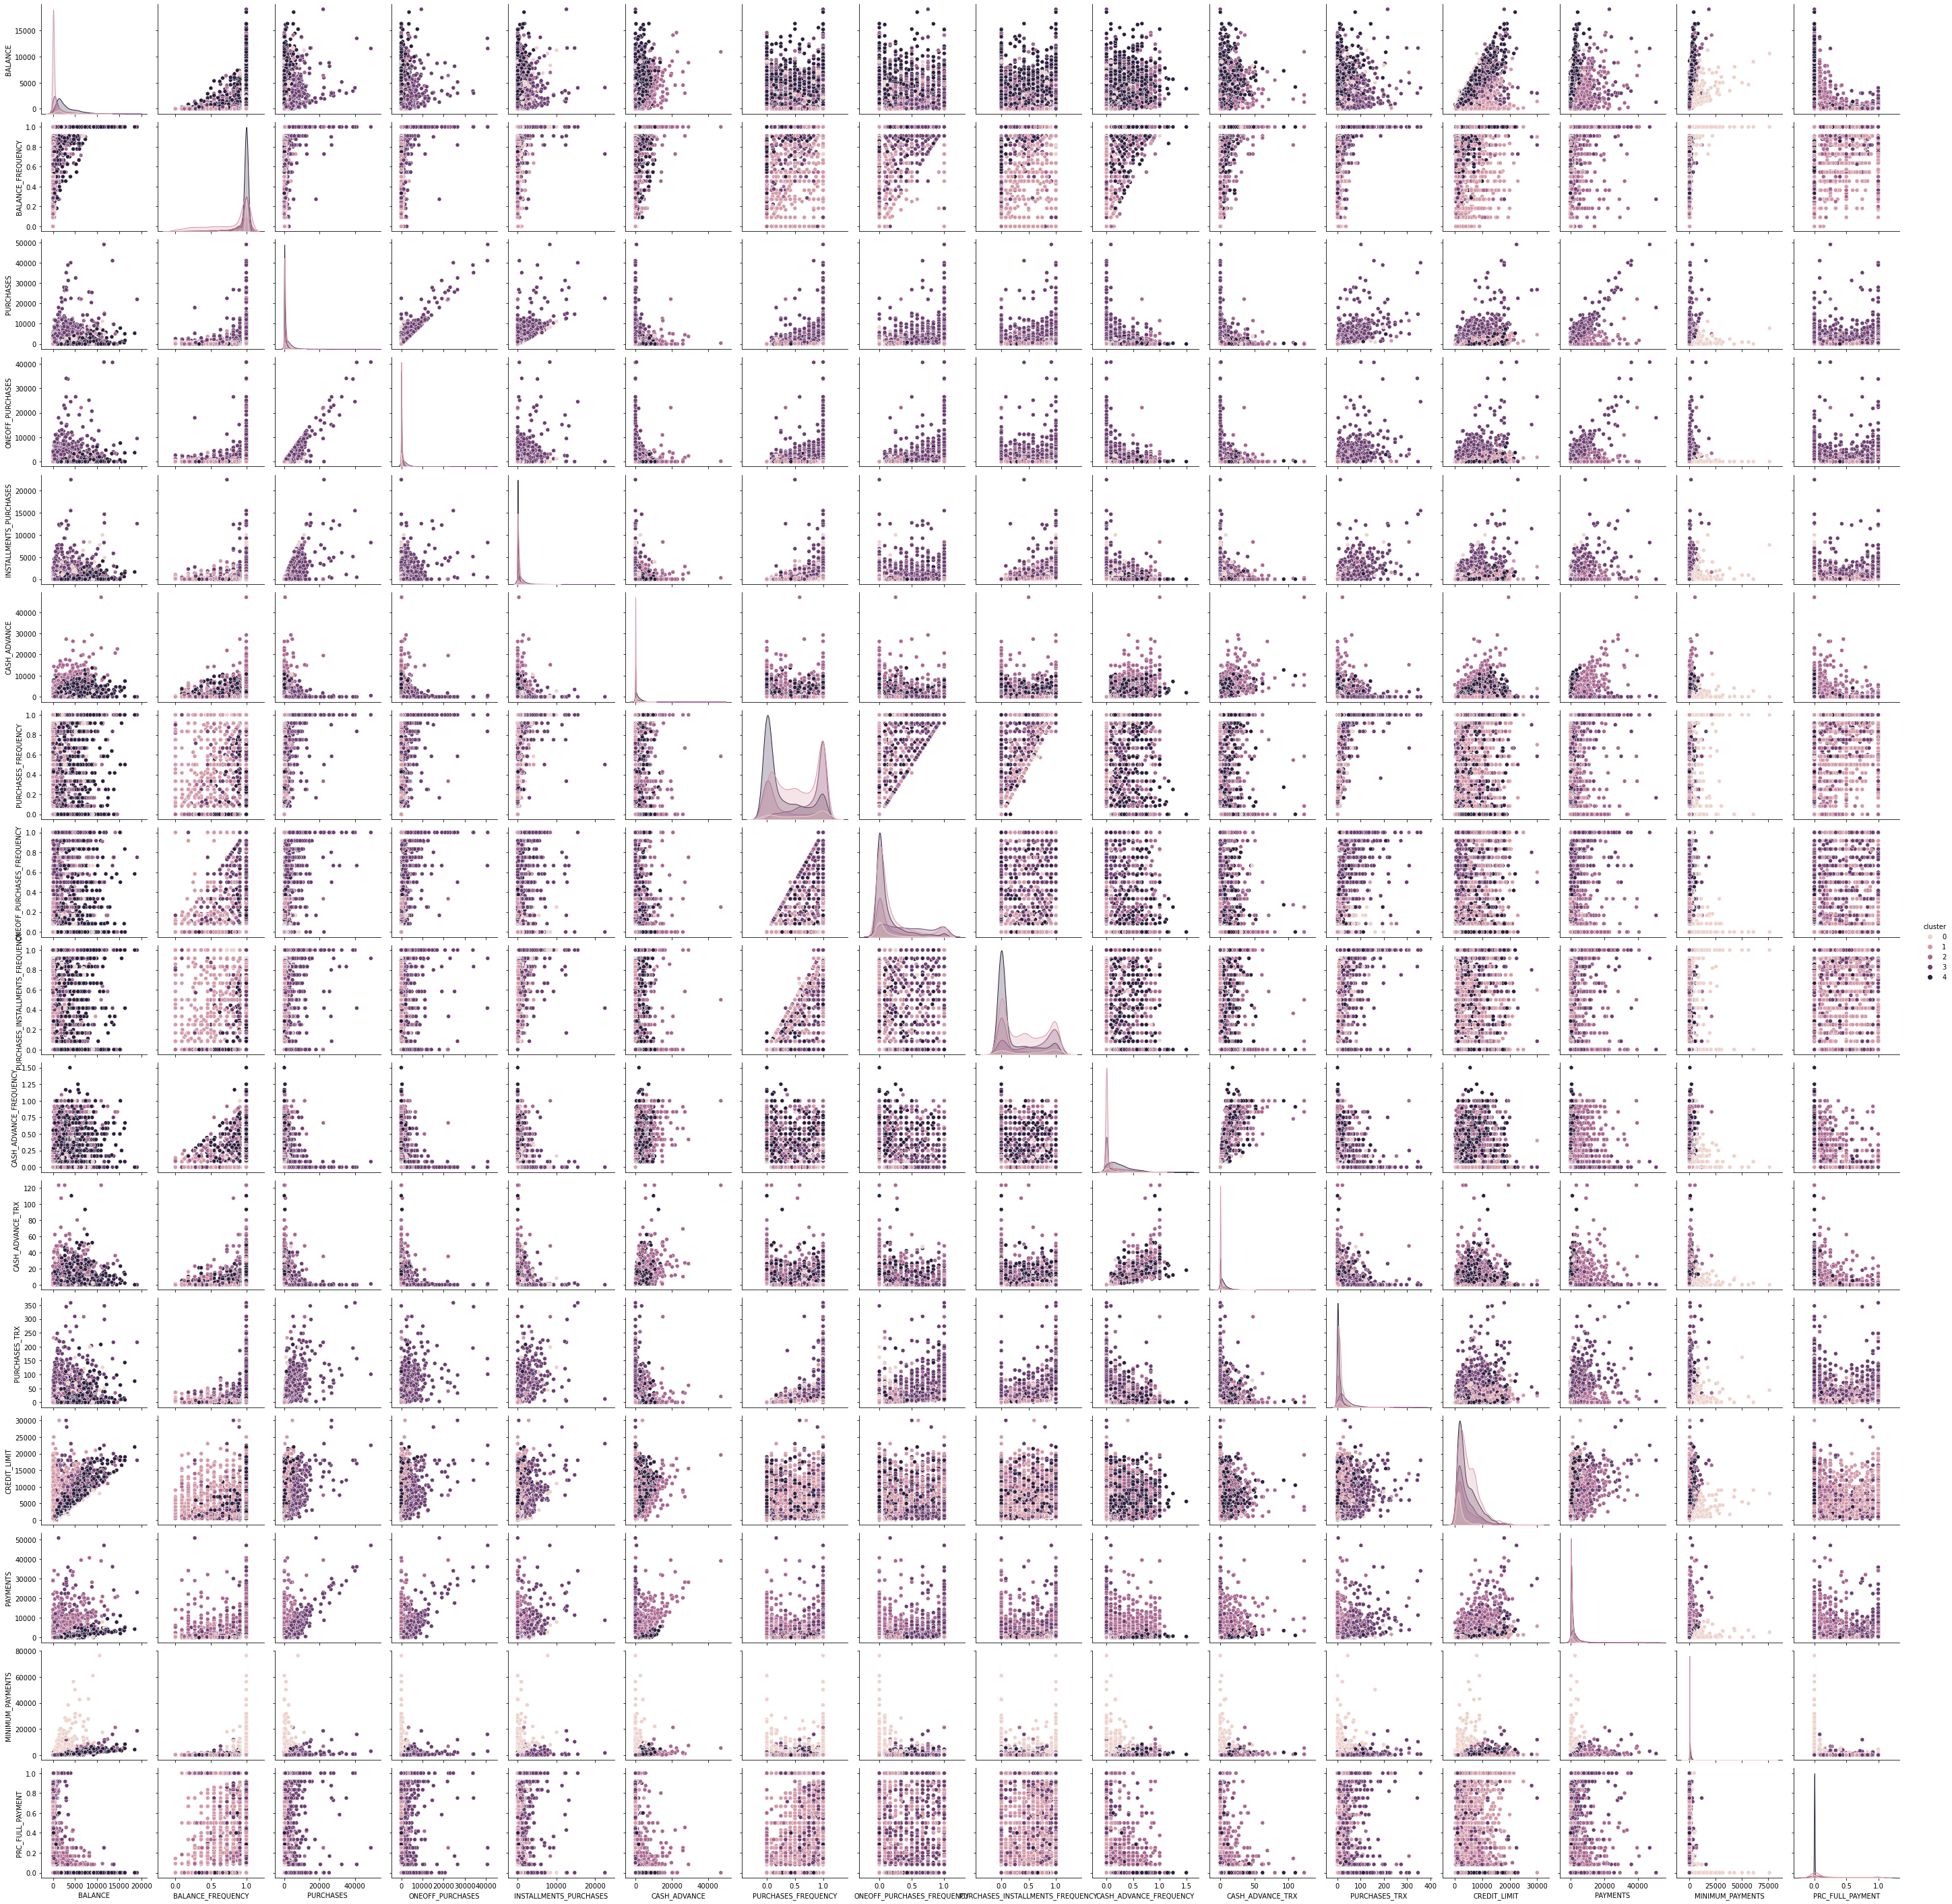

In [89]:
import seaborn as sns


df["cluster"] = labels
sns.pairplot(df[0:], hue="cluster")

In [90]:
df.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         411.0  1987.501586  1854.459156  70.794108  1018.958891   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        1073.0  1795.328292  1982.485775   0.000000   507.076999   
3        1537.0  1142.320861  1664.363459   0.000000   212.282538   
4        2649.0  3037.962543  2478.838161   6.824905  1256.612223   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1337.287314  2138.678431  11670.179850             411.0  0.989486   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
3         555.131027  1370.317105  19043.138560            1537.0  0.928267   
4        2174.018945  4223.867789  18495.558550            2649.0  0.963740   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7112.618584  76406.207520            411.0  0.019318   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...       884.183626  21235.065300           1073.0  0.117430   
3        ...       523.893953  18621.013310           1537.0  0.278150   
4        ...      1330.593643   8345.641905           2649.0  0.001799   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.090901  0.0  0.0  0.000000  0.000000  1.0  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.186772  0.0  0.0  0.083333  0.142857  1.0  
3        0.367086  0.0  0.0  0.083333  0.545455  1.0  
4        0.023260  0.0  0.0  0.000000  0.000000  0.6  

[5 rows x 128 columns]

In [92]:
centroids = cluster.cluster_centers_
print(centroids.shape)

(5, 16)


In [96]:
X = np.identity(4)
for i in range(X.shape[0]):
    print('Line {}:'.format(i+1), X[i, :])

Line 1: [1. 0. 0. 0.]
Line 2: [0. 1. 0. 0.]
Line 3: [0. 0. 1. 0.]
Line 4: [0. 0. 0. 1.]


In [142]:
atributes_var_df = pd.DataFrame()
max = centroids.shape[1]
for i in range(max):
    df_temp = pd.DataFrame({
                            'atribute': [df.columns.values[i]],
                            'var': [centroids[:, i].var()]
                            })
    atributes_var_df = atributes_var_df.append(df_temp, ignore_index=True)
df_extracted = atributes_var_df.sort_values(by='var', ascending=False).loc[:10]
df_extracted

atribute           var
14        MINIMUM_PAYMENTS  5.433313e-02
12            CREDIT_LIMIT  3.597062e-02
13                PAYMENTS  2.793596e-02
5             CASH_ADVANCE  2.251462e-02
0                  BALANCE  2.241269e-02
2                PURCHASES  1.967284e-02
3         ONEOFF_PURCHASES  7.654574e-03
4   INSTALLMENTS_PURCHASES  3.576341e-03
11           PURCHASES_TRX  3.424850e-06
10        CASH_ADVANCE_TRX  3.297668e-07

In [143]:
df_extracted.drop(index=[14, 3, 4, 11, 10], axis=0, inplace=True)
df_extracted

atribute       var
12  CREDIT_LIMIT  0.035971
13      PAYMENTS  0.027936
5   CASH_ADVANCE  0.022515
0        BALANCE  0.022413
2      PURCHASES  0.019673

In [153]:
df_subset = df.groupby("cluster")[df_extracted.atribute.tolist()]
n_clients = df_subset.size()
df_subset_mean = df_subset.mean()
df_subset_mean['n_clients'] = n_clients
df_subset_mean

CREDIT_LIMIT     PAYMENTS  CASH_ADVANCE      BALANCE    PURCHASES  \
cluster                                                                      
0         2227.737226  1336.238911    421.129352  1987.501586   854.865815   
1         5130.547795   814.294226    141.482978   443.746756   629.249107   
2         3982.452201  4713.384730   3267.199032  1795.328292   476.810531   
3         4097.306540  3036.763695    183.376625  1142.320861  3273.425517   
4         4495.771989   968.890376   1636.917210  3037.962543   385.248630   

         n_clients  
cluster             
0              411  
1             3280  
2             1073  
3             1537  
4             2649

What can we conclude from the above clustering?

Clients of cluster #0: Bad payers, low #clients
Clients of cluster #2: Best payers, low limit, low #clients => increase limit, #clients
Clients of cluster #4: Worst payers, high limit, high #clients => decrease limit